Training and Testing Data

In [1]:
# import packages
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor 

In [2]:
# Training Data and testing data
traindata = pd.read_csv("train_data.csv")
testdata = pd.read_csv("test_data.csv")

In [3]:
# China
rx_train_c = traindata.T[7:].T
rx_test_c = testdata.T[7:].T
ry_train_c_all = traindata['CSI300']
ry_test_c_all = testdata['CSI300']
ry_train_c_r = traindata['cproducts_ch']
ry_test_c_r = testdata['cproducts_ch']
ry_train_c_p = traindata['healthcare_ch']
ry_test_c_p = testdata['healthcare_ch']

In [4]:
# USA
rx_train_u = traindata[['CSI300', 'cproducts_ch', 'healthcare_ch', 'lNew_cases_CH', 'lNew_deaths_CH','lNew_cases_US', 'lNew_deaths_US', 'lCOMEX_Gold', 'lUS_Tbill_10yr','lSP500', 'lDJI_Retail','lDJI_Pharma']]
rx_test_u = testdata[['CSI300', 'cproducts_ch', 'healthcare_ch', 'lNew_cases_CH', 'lNew_deaths_CH','lNew_cases_US', 'lNew_deaths_US', 'lCOMEX_Gold', 'lUS_Tbill_10yr','lSP500', 'lDJI_Retail','lDJI_Pharma']]
ry_train_u_all = traindata['SP500']
ry_test_u_all = testdata['SP500']
ry_train_u_r = traindata['DJI_Retail']
ry_test_u_r = testdata['DJI_Retail']
ry_train_u_p = traindata['DJI_Pharma']
ry_test_u_p = testdata['DJI_Pharma']

In [5]:
# Standardize the data
def standardize(x):
    return (x - x.mean())/x.std()

def standardize_test(x,y):
    return (x - y.mean())/y.std()

In [6]:
# Standardize and add the offset
# China
x_train_c = standardize(rx_train_c)
x_train_c = pd.concat([x_train_c,pd.DataFrame(list(1 for i in range(184)))],axis = 1)
x_test_c = standardize_test(rx_test_c, rx_train_c)
x_test_c = pd.concat([x_test_c,pd.DataFrame(list(1 for i in range(23)))],axis = 1)
y_train_c_all = standardize(ry_train_c_all)
y_test_c_all = standardize_test(ry_test_c_all, ry_train_c_all)
y_train_c_r = standardize(ry_train_c_r)
y_test_c_r = standardize_test(ry_test_c_r, ry_train_c_r)
y_train_c_p = standardize(ry_train_c_p)
y_test_c_p = standardize_test(ry_test_c_p, ry_train_c_p)
# USA
x_train_u = standardize(rx_train_u)
x_train_u = pd.concat([x_train_u,pd.DataFrame(list(1 for i in range(184)))],axis = 1)
x_test_u = standardize_test(rx_test_u, rx_train_u)
x_test_u = pd.concat([x_test_u,pd.DataFrame(list(1 for i in range(23)))],axis = 1)
y_train_u_all = standardize(ry_train_u_all)
y_test_u_all = standardize_test(ry_test_u_all, ry_train_u_all)
y_train_u_r = standardize(ry_train_u_r)
y_test_u_r = standardize_test(ry_test_u_r, ry_train_u_r)
y_train_u_p = standardize(ry_train_u_p)
y_test_u_p = standardize_test(ry_test_u_p, ry_train_u_p)

SVR

In [8]:
# R^2 
def r_squre(y_true, y_pred):
    numerator = ((y_true - y_pred) ** 2).sum()
    denominator = ((y_true - np.average(y_true)) ** 2).sum()
    r2 = 1 - (numerator / denominator)
    return r2

In [158]:
# China
r2_list = []
mse_list = []
mae_list = []
china_y_list = [[y_train_c_all, y_train_c_r, y_train_c_p],[y_test_c_all, y_test_c_r, y_test_c_p]]
for i in range(3):
    y_test = china_y_list[1][i]
    clst = svm.LinearSVR(max_iter=1000000)
    clst.fit(x_train_c, china_y_list[0][i])
    print(clst.coef_)
    y_predict = clst.predict(x_test_c)
    r2 = r_squre(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict, squared=True)
    mae = mean_absolute_error(y_test, y_predict)
    r2_list.append(r2)
    mse_list.append(mse)
    mae_list.append(mae)
    print("r2 is ",r2,". MSE is ",mse,". MAE is ",mae,".")

[ 0.04962207 -0.01506673  0.03990637 -0.00449996  0.03174722 -0.01813648
  0.96537191 -0.15089551 -0.06766588 -0.03312974  0.25846504 -0.03578108
 -0.00560657]
r2 is  0.5959655087220385 . MSE is  0.006684013565058477 . MAE is  0.06540020382514537 .
[ 0.04171191 -0.01722619  0.02495356  0.005232    0.00739733 -0.03006001
  0.09478742  0.77676194 -0.06614813 -0.0584333   0.22664566 -0.02947958
  0.00406019]
r2 is  0.36807506265185375 . MSE is  0.00639561465914778 . MAE is  0.06149689430897372 .
[ 0.05035788 -0.0223319   0.0018626   0.04203813 -0.02594191 -0.06595477
  0.13683437 -0.22100823  0.84693511 -0.04111552  0.26857466 -0.03327977
  0.00115532]
r2 is  0.33773476300123084 . MSE is  0.014221773269616855 . MAE is  0.09471195713121468 .


In [159]:
# USA
usa_y_list = [[y_train_u_all, y_train_u_r, y_train_u_p],[y_test_u_all, y_test_u_r, y_test_u_p]]
for i in range(3):
    y_test = usa_y_list[1][i]
    clst = svm.LinearSVR(max_iter=1000000)
    clst.fit(x_train_u, usa_y_list[0][i])
    print(clst.coef_)
    y_predict = clst.predict(x_test_u)
    r2 = r_squre(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict, squared=True)
    mae = mean_absolute_error(y_test, y_predict)
    r2_list.append(r2)
    mse_list.append(mse)
    mae_list.append(mae)
    print("r2 is ",r2,". MSE is ",mse,". MAE is ",mae,".")

[-0.06523609  0.19119286  0.01168626  0.06289658 -0.07176361 -0.22036558
  0.14183619 -0.11390852 -0.03323481  0.91852291  0.08265854 -0.05411536
  0.01978728]
r2 is  0.7736836504089869 . MSE is  0.005434927838638019 . MAE is  0.05684016032730183 .
[-0.05516733  0.10991148  0.10336603  0.01892959 -0.02431133 -0.09696967
  0.06695188 -0.05179657  0.00187017 -0.00545513  0.90512817 -0.01777279
  0.0083464 ]
r2 is  0.03209422992383637 . MSE is  0.006192040821434233 . MAE is  0.05956904437297661 .
[-0.08936221  0.35530271  0.0717292   0.03812336 -0.04657099 -0.43966907
  0.22173068 -0.2816454  -0.2744233   0.16216345 -0.09656101  0.84003775
  0.02526652]
r2 is  0.6942046647432243 . MSE is  0.02818094896390564 . MAE is  0.1389069365755965 .


In [160]:
# MSE, MAE 
pdmse = pd.DataFrame(mse_list,columns = ['SVR'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmae = pd.DataFrame(mae_list,columns = ['SVR'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])

Neural Network

In [125]:
# Build model by finding the best number
def find_nn(x_train,y_train):
    # number to choose
    fit_deep = 0
    nn_range = [250,300,350,400,450,500,550,600,650,700,750]
    # score for each number
    nn_scores = []
    # Find the best number
    for i in nn_range:
        # here we use 4 layers
        mlp =  MLPRegressor(alpha = 1e-5, hidden_layer_sizes = (i,i), random_state = 1)
        score = cross_val_score(mlp, x_train, y_train, cv = 3, scoring = 'explained_variance')
        # find by looking for the highest score
        if score.mean() > max(max(nn_scores,[0])):
            fit_deep = i
        nn_scores.append(score.mean())
    print(fit_deep)
    plt.plot(nn_range, nn_scores)
    plt.xlabel('depth')
    plt.ylabel('cross_score')
    figure = plt.figure()
    plt.show()

300


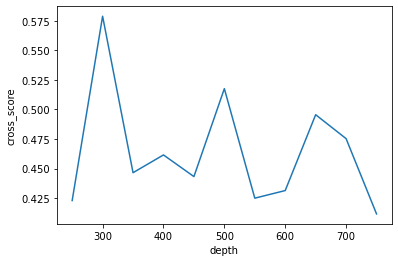

<Figure size 432x288 with 0 Axes>

In [131]:
# USA SP500
find_nn(x_train_u,y_train_u_all)

300


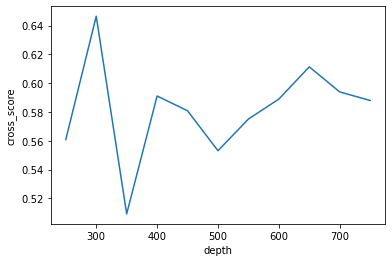

<Figure size 432x288 with 0 Axes>

In [130]:
# USA retail
find_nn(x_train_u,y_train_u_r)

450


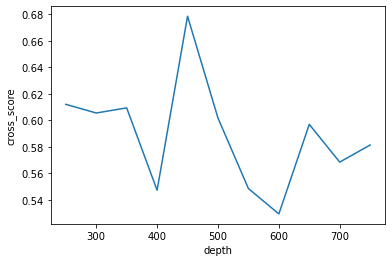

<Figure size 432x288 with 0 Axes>

In [129]:
# USA phar
find_nn(x_train_u,y_train_u_p)

450


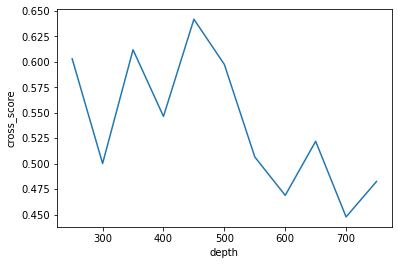

<Figure size 432x288 with 0 Axes>

In [128]:
# China CSI300
find_nn(x_train_c,y_train_c_all)

600


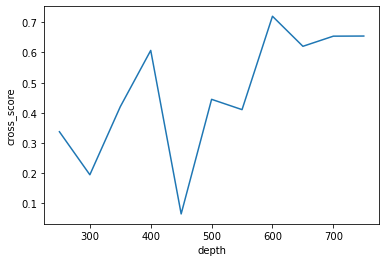

<Figure size 432x288 with 0 Axes>

In [126]:
# China retail
find_nn(x_train_c,y_train_c_r)

400


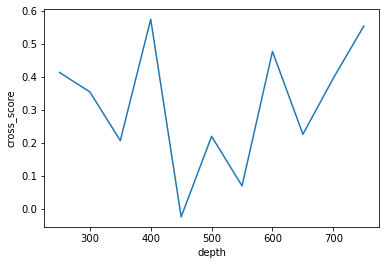

<Figure size 432x288 with 0 Axes>

In [127]:
# China phar
find_nn(x_train_c,y_train_c_p)

In [148]:
# China
mse_list = []
mae_list = []
china_y_list = [[y_train_c_all, y_train_c_r, y_train_c_p],[y_test_c_all, y_test_c_r, y_test_c_p]]
i_list = [450,600,400]
for i in range(3):
    y_test = china_y_list[1][i]
    j = i_list[i]
    mlp =  MLPRegressor(alpha = 1e-5, hidden_layer_sizes = (j,j), random_state = 1)
    mlp.fit(x_train_c, china_y_list[0][i])
    y_predict = mlp.predict(x_test_c)
    mse = mean_squared_error(y_test, y_predict, squared=True)
    mae = mean_absolute_error(y_test, y_predict)
    mse_list.append(mse)
    mae_list.append(mae)
    print("MSE is ",mse,". MAE is ",mae,".")

MSE is  0.05414531986856103 . MAE is  0.20469636834744798 .
MSE is  0.006750405176763855 . MAE is  0.0719961437984423 .
MSE is  0.17001448698606988 . MAE is  0.3879429115989939 .


In [149]:
# USA
i_list = [300,300,450]
for i in range(3):
    y_test = usa_y_list[1][i]
    j = i_list[i]
    mlp =  MLPRegressor(alpha = 1e-5, hidden_layer_sizes = (j,j), random_state = 1)
    mlp.fit(x_train_u, usa_y_list[0][i])
    y_predict = mlp.predict(x_test_u)
    mse = mean_squared_error(y_test, y_predict, squared=True)
    mae = mean_absolute_error(y_test, y_predict)
    mse_list.append(mse)
    mae_list.append(mae)
    print("MSE is ",mse,". MAE is ",mae,".")

MSE is  0.07839524748896151 . MAE is  0.2566967858533895 .
MSE is  0.016523881408886852 . MAE is  0.11435188913964797 .
MSE is  0.01274618937521328 . MAE is  0.09103274425846919 .


In [162]:
# MSE, MAE 
nmse = pd.DataFrame(mse_list,columns = ['NN'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
nmae = pd.DataFrame(mae_list,columns = ['NN'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmse = pd.concat([pdmse,nmse],axis = 1)
pdmae = pd.concat([pdmae,nmae],axis = 1)

MSE & MAE

In [163]:
# We collect mse and mae data from Julia code
# Quadratic+l1
mse1_list = [0.0056675262,0.004179232,0.00463191488,0.00834485146,0.00620750251,0.0076500688]
mae1_list = [0.0654235421,0.058982864,0.06048266580,0.06547733314,0.07015449880,0.0699234155]
nmse = pd.DataFrame(mse1_list,columns = ['Quadratic+l1'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
nmae = pd.DataFrame(mae1_list,columns = ['Quadratic+l1'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmse = pd.concat([pdmse,nmse],axis = 1)
pdmae = pd.concat([pdmae,nmae],axis = 1)

In [165]:
# Quadratic+l2
mse2_list = [0.00684214889,0.0093589136,0.0075627205,0.0071973823,0.00636182509,0.00631015334]
mae2_list = [0.05320435854,0.0655482328,0.0567373750,0.0625305587,0.06160085747,0.06473200953]
nmse = pd.DataFrame(mse2_list,columns = ['Quadratic+l2'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
nmae = pd.DataFrame(mae2_list,columns = ['Quadratic+l2'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmse = pd.concat([pdmse,nmse],axis = 1)
pdmae = pd.concat([pdmae,nmae],axis = 1)

In [171]:
# quantile 0.25
mse3_list = [0.007089793,0.00873588,0.007061701,0.0048604125,0.0043377304,0.0069902217]
mae3_list = [0.054737998,0.06354510,0.053586971,0.0538320940,0.0538967915,0.0637802475]
nmse = pd.DataFrame(mse3_list,columns = ['Quantile 0.25'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
nmae = pd.DataFrame(mae3_list,columns = ['Quantile 0.25'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmse = pd.concat([pdmse,nmse],axis = 1)
pdmae = pd.concat([pdmae,nmae],axis = 1)

In [172]:
# quantile 0.5
mse4_list = [0.007200110,0.00547563,0.003925071,0.0038809369,0.0065462707,0.0036205859]
mae4_list = [0.056705914,0.05079310,0.040473573,0.0436233108,0.0567616190,0.0492947858]
nmse = pd.DataFrame(mse4_list,columns = ['Quantile 0.5'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
nmae = pd.DataFrame(mae4_list,columns = ['Quantile 0.5'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmse = pd.concat([pdmse,nmse],axis = 1)
pdmae = pd.concat([pdmae,nmae],axis = 1)

In [173]:
# quantile 0.75
mse5_list = [0.007493629,0.01377436,0.007725487,0.0056740352,0.0096748378,0.0043986957]
mae5_list = [0.055664641,0.07983077, 0.05816546,0.0554683142,0.0702245584,0.0520605143]
nmse = pd.DataFrame(mse5_list,columns = ['Quantile 0.75'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
nmae = pd.DataFrame(mae5_list,columns = ['Quantile 0.75'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmse = pd.concat([pdmse,nmse],axis = 1)
pdmae = pd.concat([pdmae,nmae],axis = 1)

In [174]:
pdmae

,SVR,NN,Quadratic+l1,Quadratic+l2,Quantile 0.25,Quantile 0.5,Quantile 0.75
China_CSI300,0.065400,0.065400,0.065424,0.053204,0.054738,0.056706,0.055665
China_Consumer products,0.061497,0.061497,0.058983,0.065548,0.063545,0.050793,0.079831
China_Healthcare,0.094712,0.094712,0.060483,0.056737,0.053587,0.040474,0.058165
USA_SP500,0.056840,0.056840,0.065477,0.062531,0.053832,0.043623,0.055468
USA_Consumer products,0.059569,0.059569,0.070154,0.061601,0.053897,0.056762,0.070225
USA_Healthcare,0.138907,0.138907,0.069923,0.064732,0.063780,0.049295,0.052061


In [175]:
pdmse

,SVR,NN,Quadratic+l1,Quadratic+l2,Quantile 0.25,Quantile 0.5,Quantile 0.75
China_CSI300,0.006684,0.006684,0.005668,0.006842,0.007090,0.007200,0.007494
China_Consumer products,0.006396,0.006396,0.004179,0.009359,0.008736,0.005476,0.013774
China_Healthcare,0.014222,0.014222,0.004632,0.007563,0.007062,0.003925,0.007725
USA_SP500,0.005435,0.005435,0.008345,0.007197,0.004860,0.003881,0.005674
USA_Consumer products,0.006192,0.006192,0.006208,0.006362,0.004338,0.006546,0.009675
USA_Healthcare,0.028181,0.028181,0.007650,0.006310,0.006990,0.003621,0.004399
